In [1]:
#merge data from several states
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
trainval = pd.read_csv('./data/trainval_all_combined_v2.csv')
trainval.head()

,id,age,gender,size,breeds.primary,breeds.mixed,log_breed_pop,breed_popularity,contact.address.state,log_dog_pop,state_population,state_area,state_region,cg_adpt_time
0,36351232,1,Male,2,Labrador Retriever,True,11.241825,High,SC,9.580524,15.442575,10.373710,South,< 1 month
1,43002404,3,Male,2,Chocolate Labrador Retriever,True,7.844241,Low,LA,10.005954,15.359345,10.855975,South,1 - 2 weeks
2,33793853,2,Female,1,Beagle,False,9.883234,Medium,MA,10.196456,15.746440,9.264355,Northeast,< 1 month
3,35622718,4,Female,2,Labrador Retriever,True,11.241825,High,AZ,10.126591,15.778966,11.644006,West,> 3 months
4,45977377,3,Female,2,Border Collie,True,9.400465,Medium,LA,10.005954,15.359345,10.855975,South,< 3 months


In [8]:
test = pd.read_csv('./data/test_all_combined_v2.csv')
test.head()

,id,age,gender,size,breeds.primary,breeds.mixed,log_breed_pop,breed_popularity,contact.address.state,log_dog_pop,state_population,state_area,state_region,cg_adpt_time
0,35051791,4,Male,1,Shih Tzu,True,9.274910,Medium,WA,9.942420,15.834479,11.174694,West,< 3 months
1,39808452,1,Female,1,Terrier,True,10.291332,High,OR,9.680344,15.250491,11.496654,West,< 1 week
2,32838635,3,Female,3,Golden Retriever,False,8.728912,Low,ME,9.285448,14.109360,10.474100,Northeast,< 1 week
3,29518856,3,Female,3,Greyhound,False,8.146709,Low,GA,9.815039,16.171175,10.992740,South,> 3 months
4,31272523,2,Male,3,Shepherd,False,10.066074,Medium,NV,9.605957,14.932887,11.613377,West,< 1 month


In [9]:
cat_col = ['gender','breeds.primary','breed_popularity','contact.address.state','state_region','cg_adpt_time']
trainval[cat_col]=trainval[cat_col].astype('category')
test[cat_col]=test[cat_col].astype('category')

In [5]:
# Check for any missing data
print("Table size -", end=' ')
print(trainval.shape)

print("Checking for missing values..")
# Number of missing values in each column of training data
missing_val_count_by_column = (trainval.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Get names of columns with missing values
#missing_cols = [col for col in extension_data.columns
#                     if extension_train[col].isnull().any()]

Table size - (483796, 13)
Checking for missing values..
Series([], dtype: int64)


In [6]:
len(trainval)

483796

In [10]:
#test with small number of features, take off name_pop for now
X_features = ['age', 'gender', 'size',
               'breeds.primary','breeds.mixed', 'breed_popularity',
              'log_breed_pop', 'log_dog_pop', 'state_population',
             'state_area', 'state_region','contact.address.state']
trainval_X = trainval[X_features]
trainval_X.head()

,age,gender,size,breeds.primary,breeds.mixed,breed_popularity,log_breed_pop,log_dog_pop,state_population,state_area,state_region,contact.address.state
0,1,Male,2,Labrador Retriever,True,High,11.241825,9.580524,15.442575,10.373710,South,SC
1,3,Male,2,Chocolate Labrador Retriever,True,Low,7.844241,10.005954,15.359345,10.855975,South,LA
2,2,Female,1,Beagle,False,Medium,9.883234,10.196456,15.746440,9.264355,Northeast,MA
3,4,Female,2,Labrador Retriever,True,High,11.241825,10.126591,15.778966,11.644006,West,AZ
4,3,Female,2,Border Collie,True,Medium,9.400465,10.005954,15.359345,10.855975,South,LA


In [11]:
trainval_y = trainval['cg_adpt_time']
trainval_y.head()

0      < 1 month
1    1 - 2 weeks
2      < 1 month
3     > 3 months
4     < 3 months
Name: cg_adpt_time, dtype: category
Categories (5, object): [1 - 2 weeks, < 1 month, < 1 week, < 3 months, > 3 months]

In [12]:
trainval_X.head()

,age,gender,size,breeds.primary,breeds.mixed,breed_popularity,log_breed_pop,log_dog_pop,state_population,state_area,state_region,contact.address.state
0,1,Male,2,Labrador Retriever,True,High,11.241825,9.580524,15.442575,10.373710,South,SC
1,3,Male,2,Chocolate Labrador Retriever,True,Low,7.844241,10.005954,15.359345,10.855975,South,LA
2,2,Female,1,Beagle,False,Medium,9.883234,10.196456,15.746440,9.264355,Northeast,MA
3,4,Female,2,Labrador Retriever,True,High,11.241825,10.126591,15.778966,11.644006,West,AZ
4,3,Female,2,Border Collie,True,Medium,9.400465,10.005954,15.359345,10.855975,South,LA


In [13]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(trainval_X, trainval_y, test_size=0.2)
print('Training set size = {} and Validation set size = {}'.format(len(train_X),len(val_X)))

Training set size = 387036 and Validation set size = 96760


In [14]:
train_X.head()

,age,gender,size,breeds.primary,breeds.mixed,breed_popularity,log_breed_pop,log_dog_pop,state_population,state_area,state_region,contact.address.state
106205,2,Female,2,Labrador Retriever,True,High,11.241825,10.539985,15.553201,11.553107,West,CO
338140,2,Male,1,Shih Tzu,True,Medium,9.274910,9.822820,15.576476,11.089851,Midwest,WI
328888,2,Female,1,Terrier,True,High,10.291332,10.539985,15.553201,11.553107,West,CO
146822,3,Male,3,Mastiff,False,Low,8.016978,9.739261,15.717563,10.502873,Midwest,IN
130293,3,Female,2,Basset Hound,False,Low,8.216899,10.005954,15.359345,10.855975,South,LA


In [15]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
cat_col = ['gender','breeds.primary','breed_popularity','contact.address.state','state_region','cg_adpt_time']

In [16]:
train_X.dtypes

age                         int64
gender                   category
size                        int64
breeds.primary           category
breeds.mixed                 bool
breed_popularity         category
log_breed_pop             float64
log_dog_pop               float64
state_population          float64
state_area                float64
state_region             category
contact.address.state    category
dtype: object

In [17]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score

In [18]:
train_y.dtypes

CategoricalDtype(categories=['1 - 2 weeks', '< 1 month', '< 1 week', '< 3 months',
                  '> 3 months'],
                 ordered=False)

In [19]:
from sklearn.pipeline import Pipeline

In [49]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    pipeline_temp = Pipeline(steps=[('preprocessor', oh),('model', rf)])
    start = time.time()
    pipeline_temp.fit(train_X, train_y)
    end = time.time()
    fit_time = end - start
    #scores= -1 * cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='neg_mean_absolute_error')
    start = time.time()
    y_pred = pipeline_temp.predict(val_X)
    end = time.time()
    predict_time = end - start
    #r2s= cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='r2')
    #print('Est: {} / Depth: {} ---- MAE: {} R^2: {}'.format(n_est,depth,round(scores.mean(), 3),round(r2s.mean(), 3)))
    print('Est: {} / Depth: {} ---- Fit time: {} / Predict time: {} / Accuracy: {}'.format(
        n_est,depth,fit_time, predict_time, round((y_pred==val_y).sum()/len(y_pred), 3)))

In [50]:
for n_est in [10, 50, 100, 200]:
    for depth in [10, 50, 100, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Fit time: 15.473611116409302 / Predict time: 2.494481086730957 / Accuracy: 0.301
Est: 10 / Depth: 50 ---- Fit time: 24.592058420181274 / Predict time: 0.7177867889404297 / Accuracy: 0.311
Est: 10 / Depth: 100 ---- Fit time: 26.772536754608154 / Predict time: 0.7061645984649658 / Accuracy: 0.304
Est: 10 / Depth: None ---- Fit time: 25.013928413391113 / Predict time: 0.6990461349487305 / Accuracy: 0.304
Est: 50 / Depth: 10 ---- Fit time: 39.952818870544434 / Predict time: 0.8098020553588867 / Accuracy: 0.303
Est: 50 / Depth: 50 ---- Fit time: 105.8734941482544 / Predict time: 1.4912152290344238 / Accuracy: 0.316
Est: 50 / Depth: 100 ---- Fit time: 110.92152380943298 / Predict time: 2.265547752380371 / Accuracy: 0.307
Est: 50 / Depth: None ---- Fit time: 104.27123022079468 / Predict time: 2.061232805252075 / Accuracy: 0.306
Est: 100 / Depth: 10 ---- Fit time: 67.69448971748352 / Predict time: 1.5016143321990967 / Accuracy: 0.303
Est: 100 / Depth: 50 ---- Fit time:

In [38]:
for n_est in [100, 150, 200, 250]:
    for depth in [30, 40, 50, 60]:
        train_RF(n_est, depth)

Est: 100 / Depth: 30 ---- Fit time: 199.89548540115356 / Predict time: 2.6306707859039307 / Accuracy: 0.322
Est: 100 / Depth: 40 ---- Fit time: 234.63526678085327 / Predict time: 3.1803433895111084 / Accuracy: 0.32
Est: 100 / Depth: 50 ---- Fit time: 255.78041696548462 / Predict time: 3.786173105239868 / Accuracy: 0.314
Est: 100 / Depth: 60 ---- Fit time: 271.31245279312134 / Predict time: 3.815086603164673 / Accuracy: 0.312
Est: 150 / Depth: 30 ---- Fit time: 303.3616180419922 / Predict time: 3.494270086288452 / Accuracy: 0.324
Est: 150 / Depth: 40 ---- Fit time: 376.6917893886566 / Predict time: 4.659846305847168 / Accuracy: 0.319
Est: 150 / Depth: 50 ---- Fit time: 394.3275411128998 / Predict time: 5.69328761100769 / Accuracy: 0.315
Est: 150 / Depth: 60 ---- Fit time: 408.54864287376404 / Predict time: 5.598904848098755 / Accuracy: 0.311
Est: 200 / Depth: 30 ---- Fit time: 405.64442110061646 / Predict time: 4.876736640930176 / Accuracy: 0.323
Est: 200 / Depth: 40 ---- Fit time: 479.

In [ ]:
rf = RandomForestClassifier(n_estimators=150, max_depth=30, n_jobs=-1)
pipeline_temp2 = Pipeline(steps=[('preprocessor', oh),('model', rf)])
start = time.time()
pipeline_temp2.fit(train_X, train_y)
end = time.time()
fit_time = end - start
#scores= -1 * cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='neg_mean_absolute_error')
y_pred = pipeline_temp2.predict(val_X)
round((y_pred==val_y).sum()/len(y_pred), 3)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [22]:
rf = RandomForestClassifier(n_estimators=150, max_depth=30, n_jobs=-1)
categorical_features = ['gender','breeds.primary','breed_popularity','contact.address.state','state_region']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))])
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)], remainder='passthrough')
pipeline_temp = Pipeline(steps=[('preprocessor', preprocessor),('model', rf)])
start = time.time()
pipeline_temp.fit(train_X, train_y)
end = time.time()

In [23]:
pipeline_temp['model'].feature_importances_

array([0.04095653, 0.04111344, 0.00318689, 0.00688339, 0.00400655,
       0.00496026, 0.00244575, 0.00510502, 0.00192092, 0.00381635,
       0.00124437, 0.00426865, 0.00240664, 0.0050331 , 0.00138886,
       0.00189136, 0.00217637, 0.00239393, 0.00466397, 0.00191413,
       0.00151818, 0.00263083, 0.00208589, 0.00163129, 0.00233757,
       0.00463112, 0.00223994, 0.0017546 , 0.00470521, 0.00165049,
       0.00329448, 0.00240778, 0.00241489, 0.00316199, 0.00415221,
       0.00289904, 0.00317957, 0.00443762, 0.00179266, 0.00274861,
       0.0018412 , 0.00281454, 0.00838105, 0.00164744, 0.00168278,
       0.00833217, 0.00148196, 0.00189435, 0.00272091, 0.00532075,
       0.00284234, 0.00573466, 0.00280885, 0.0035433 , 0.00261423,
       0.00154503, 0.00320587, 0.00172396, 0.00445538, 0.00178918,
       0.00431035, 0.00242793, 0.00232073, 0.00230671, 0.00475224,
       0.00167645, 0.00281773, 0.00163334, 0.00143742, 0.00216702,
       0.00242105, 0.00327275, 0.00434899, 0.00385917, 0.00483

In [24]:
y_pred = pipeline_temp.predict(val_X)
round((y_pred==val_y).sum()/len(y_pred), 3)

0.313

In [46]:
def train_RF_2(n_est, depth):
    categorical_features = ['gender', 'state_region']
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))])
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features)], remainder='passthrough')
    pipeline_temp = Pipeline(steps=[('preprocessor', preprocessor),('model', rf)])
    start = time.time()
    pipeline_temp.fit(train_X, train_y)
    end = time.time()
    fit_time = end - start
    #scores= -1 * cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='neg_mean_absolute_error')
    start = time.time()
    y_pred = pipeline_temp.predict(val_X)
    end = time.time()
    predict_time = end - start
    #r2s= cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='r2')
    #print('Est: {} / Depth: {} ---- MAE: {} R^2: {}'.format(n_est,depth,round(scores.mean(), 3),round(r2s.mean(), 3)))
    print('Est: {} / Depth: {} ---- Fit time: {} / Predict time: {} / Accuracy: {}'.format(
        n_est,depth,fit_time, predict_time, round((y_pred==val_y).sum()/len(y_pred), 3)))

In [48]:
for n_est in [100, 150, 200, 250]:
    for depth in [30, 40, 50, 60]:
        train_RF_2(n_est, depth)

Est: 100 / Depth: 30 ---- Fit time: 54.64836120605469 / Predict time: 3.0222551822662354 / Accuracy: 0.304
Est: 100 / Depth: 40 ---- Fit time: 52.29619288444519 / Predict time: 4.100038290023804 / Accuracy: 0.303
Est: 100 / Depth: 50 ---- Fit time: 59.462018728256226 / Predict time: 3.8525631427764893 / Accuracy: 0.302
Est: 100 / Depth: 60 ---- Fit time: 55.26665735244751 / Predict time: 3.5056264400482178 / Accuracy: 0.303
Est: 150 / Depth: 30 ---- Fit time: 52.687329053878784 / Predict time: 2.758556604385376 / Accuracy: 0.303
Est: 150 / Depth: 40 ---- Fit time: 49.007484912872314 / Predict time: 2.799514055252075 / Accuracy: 0.303
Est: 150 / Depth: 50 ---- Fit time: 47.07659840583801 / Predict time: 2.7487106323242188 / Accuracy: 0.304
Est: 150 / Depth: 60 ---- Fit time: 47.86254525184631 / Predict time: 2.8676652908325195 / Accuracy: 0.302
Est: 200 / Depth: 30 ---- Fit time: 48.47635579109192 / Predict time: 3.041867256164551 / Accuracy: 0.303
Est: 200 / Depth: 40 ---- Fit time: 48

In [17]:
from sklearn.linear_model import LogisticRegression

In [20]:
def train_LR(c, m):
    lr = LogisticRegression(C=c, max_iter=m, n_jobs=-1)
    pipeline_temp = Pipeline(steps=[('preprocessor', oh),('model', lr)])
    start = time.time()
    pipeline_temp.fit(train_X, train_y)
    end = time.time()
    fit_time = end - start
    #scores= -1 * cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='neg_mean_absolute_error')
    start = time.time()
    y_pred = pipeline_temp.predict(val_X)
    end = time.time()
    predict_time = end - start
    #r2s= cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='r2')
    #print('Est: {} / Depth: {} ---- MAE: {} R^2: {}'.format(n_est,depth,round(scores.mean(), 3),round(r2s.mean(), 3)))
    print('C: {} / Max Iter: {} ---- Fit time: {} / Predict time: {} / Accuracy: {}'.format(
        c,m,fit_time, predict_time, round((y_pred==val_y).sum()/len(y_pred), 3)))

In [21]:
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    for m in [10, 100, 1000, 5000]:
        train_LR(c,m)

C: 0.001 / Max Iter: 10 ---- Fit time: 24.62791347503662 / Predict time: 0.22440147399902344 / Accuracy: 0.3
C: 0.001 / Max Iter: 100 ---- Fit time: 73.36837077140808 / Predict time: 0.23833060264587402 / Accuracy: 0.305
C: 0.001 / Max Iter: 1000 ---- Fit time: 74.21368265151978 / Predict time: 0.22735953330993652 / Accuracy: 0.305
C: 0.001 / Max Iter: 5000 ---- Fit time: 73.00452828407288 / Predict time: 0.22140932083129883 / Accuracy: 0.305
C: 0.01 / Max Iter: 10 ---- Fit time: 14.92389464378357 / Predict time: 0.21342897415161133 / Accuracy: 0.302
C: 0.01 / Max Iter: 100 ---- Fit time: 94.2195496559143 / Predict time: 0.2682819366455078 / Accuracy: 0.307
C: 0.01 / Max Iter: 1000 ---- Fit time: 147.55042243003845 / Predict time: 0.2453446388244629 / Accuracy: 0.307
C: 0.01 / Max Iter: 5000 ---- Fit time: 147.33505249023438 / Predict time: 0.2373332977294922 / Accuracy: 0.307
C: 0.1 / Max Iter: 10 ---- Fit time: 15.23764419555664 / Predict time: 0.24830365180969238 / Accuracy: 0.302
C

In [22]:
from sklearn.linear_model import RidgeClassifier

In [25]:
def train_RC(a):
    rc = RidgeClassifier(alpha=a)
    pipeline_temp = Pipeline(steps=[('preprocessor', oh),('model', rc)])
    start = time.time()
    pipeline_temp.fit(train_X, train_y)
    end = time.time()
    fit_time = end - start
    #scores= -1 * cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='neg_mean_absolute_error')
    start = time.time()
    y_pred = pipeline_temp.predict(val_X)
    end = time.time()
    predict_time = end - start
    #r2s= cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='r2')
    #print('Est: {} / Depth: {} ---- MAE: {} R^2: {}'.format(n_est,depth,round(scores.mean(), 3),round(r2s.mean(), 3)))
    print('Alpha: {} ---- Fit time: {} / Predict time: {} / Accuracy: {}'.format(
        a,fit_time, predict_time, round((y_pred==val_y).sum()/len(y_pred), 3)))

In [26]:
for a in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    train_RC(a)

Alpha: 0.001 ---- Fit time: 4.415618181228638 / Predict time: 0.32364511489868164 / Accuracy: 0.307
Alpha: 0.01 ---- Fit time: 3.6600544452667236 / Predict time: 0.24135541915893555 / Accuracy: 0.307
Alpha: 0.1 ---- Fit time: 3.588601589202881 / Predict time: 0.22838807106018066 / Accuracy: 0.307
Alpha: 1 ---- Fit time: 3.6231701374053955 / Predict time: 0.2329120635986328 / Accuracy: 0.307
Alpha: 10 ---- Fit time: 3.849255084991455 / Predict time: 0.2373669147491455 / Accuracy: 0.307
Alpha: 100 ---- Fit time: 3.5573558807373047 / Predict time: 0.23138093948364258 / Accuracy: 0.306
Alpha: 1000 ---- Fit time: 3.807166337966919 / Predict time: 0.23537564277648926 / Accuracy: 0.305


In [28]:
rc = RidgeClassifier(alpha=0.1)
pipeline_rc = Pipeline(steps=[('preprocessor', oh),('model', rc)])
pipeline_rc.fit(train_X, train_y)
y_pred = pipeline_rc.predict(val_X)
round((y_pred==val_y).sum()/len(y_pred), 3)

0.307

In [38]:
pipeline_rc['model'].coef_

array([[-3.56900367e-02,  1.16781764e-01, -7.33985118e-02,
        -7.69321654e-03,  1.34929262e-03, -1.34929262e-03,
        -1.28448448e-02, -1.22099834e-02,  2.50548280e-02,
        -1.50214686e-02, -1.33962164e-03,  1.63610902e-02,
        -6.47243395e-02, -1.13781832e-01,  4.29682461e-03,
         2.86872979e-02,  9.46410266e-04,  1.51007371e-02,
        -6.54616490e-02,  2.89887923e-02, -3.19962316e-02,
         4.53952974e-02,  9.79364060e-02, -2.66149883e-02,
        -3.92609840e-02,  6.88711495e-02,  2.24545795e-02,
        -1.70294801e-02, -1.24635349e-02,  6.69953803e-02,
        -2.29049391e-02,  3.19044249e-02,  2.86353661e-02,
        -2.70928341e-02,  2.30064597e-02, -3.45499495e-03,
        -3.80917807e-02,  3.64369766e-03, -4.03373574e-03,
        -2.32828220e-02,  2.75895799e-02, -2.18427653e-02,
        -5.72410932e-03, -1.14281418e-01, -3.11420346e-02,
         6.20759158e-02,  5.87746516e-03,  2.06592259e-02,
         1.38217013e-02,  2.25652823e-02,  1.23454538e-0

In [40]:
from scipy import stats
stats.describe(abs(pipeline_rc['model'].coef_[0]))

DescribeResult(nobs=122, minmax=(3.4195709196420286e-05, 0.14521991311142265), mean=0.03630902064766919, variance=0.0010520283757738452, skewness=1.3667499143775914, kurtosis=1.3418872103062567)

In [16]:
from xgboost import XGBClassifier
def train_XGB(lr, depth):
    xg = XGBClassifier(learning_rate=lr, max_depth=depth, n_jobs=-1)
    pipeline_temp = Pipeline(steps=[('preprocessor', oh),('model', xg)])
    start = time.time()
    pipeline_temp.fit(train_X, train_y)
    end = time.time()
    fit_time = end - start
    #scores= -1 * cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='neg_mean_absolute_error')
    start = time.time()
    y_pred = pipeline_temp.predict(val_X)
    end = time.time()
    predict_time = end - start
    #r2s= cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='r2')
    #print('Est: {} / Depth: {} ---- MAE: {} R^2: {}'.format(n_est,depth,round(scores.mean(), 3),round(r2s.mean(), 3)))
    print('Learning Rate: {} / Max Depth: {} ---- Fit time: {} / Predict time: {} / Accuracy: {}'.format(
        lr,depth,fit_time, predict_time, round((y_pred==val_y).sum()/len(y_pred), 3)))

In [18]:
for lr in [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.5]:
    for depth in [10, 100, None]:
        train_XGB(lr,depth)

Learning Rate: 0.0001 / Max Depth: 10 ---- Fit time: 1229.0884399414062 / Predict time: 3.676210641860962 / Accuracy: 0.3


KeyboardInterrupt: 

In [18]:
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
rf = RandomForestClassifier(n_estimators=150, max_depth=30, n_jobs=-1)
pipeline_temp = Pipeline(steps=[('preprocessor', oh),('model', rf)])

In [19]:
start = time.time()
pipeline_temp.fit(train_X, train_y)
end = time.time()
fit_time = end - start
print("Fit time : {}".format(fit_time))

Fit time : 162.05718278884888


In [21]:
y_pred = pipeline_temp.predict(val_X)
round((y_pred==val_y).sum()/len(y_pred), 3)

0.319

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
lr = LogisticRegression(max_iter = 1000, n_jobs=-1)
pipeline_temp3 = Pipeline(steps=[('preprocessor', oh),('model', lr)])

In [25]:
start = time.time()
pipeline_temp3.fit(train_X, train_y)
end = time.time()
fit_time = end - start
print("Fit time : {}".format(fit_time))

Fit time : 139.53930497169495


In [26]:
y_pred = pipeline_temp3.predict(val_X)

In [27]:
round((y_pred==val_y).sum()/len(y_pred), 3)

0.308

In [30]:
from sklearn.decomposition import PCA
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
lr = LogisticRegression(max_iter = 1000, n_jobs=-1)
pca=PCA()
pipeline_temp4 = Pipeline(steps=[('preprocessor', oh),('pca', pca),('model', lr)])

In [31]:
start = time.time()
pipeline_temp4.fit(train_X, train_y)
end = time.time()
fit_time = end - start
print("Fit time : {}".format(fit_time))

Fit time : 98.6362578868866


In [32]:
y_pred = pipeline_temp.predict(val_X)
round((y_pred==val_y).sum()/len(y_pred), 3)

0.319

In [33]:
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
lr = LogisticRegression(max_iter = 1000, n_jobs=-1)
pca=PCA(n_components = 10)
pipeline_temp4 = Pipeline(steps=[('preprocessor', oh),('pca', pca),('model', lr)])

In [34]:
start = time.time()
pipeline_temp4.fit(train_X, train_y)
end = time.time()
fit_time = end - start
print("Fit time : {}".format(fit_time))

Fit time : 13.779888153076172


In [35]:
y_pred = pipeline_temp.predict(val_X)
round((y_pred==val_y).sum()/len(y_pred), 3)

0.319

In [202]:
import pickle
filename = './models/lrpipe_cg.pkl'
pickle.dump(pipeline_temp3, open(filename, 'wb'))

In [188]:
train_X.head()

,age,gender,size,breed_pop,breeds.primary,breeds.mixed
480227,Baby,Female,Small,Medium,Dachshund,True
279249,Baby,Female,Medium,Medium,Boxer,True
76894,Baby,Male,Medium,High,Terrier,True
248831,Young,Male,Large,Medium,Australian Shepherd,False
281824,Senior,Male,Large,Low,Great Dane,False


In [190]:
len(train_X)

387036

In [157]:
y_pred_train = pipeline_temp.predict(train_X)
round((y_pred_train==train_y).sum()/len(y_pred_train), 3)

0.361

In [158]:
from sklearn.metrics import confusion_matrix
confusion_matrix(val_y, y_pred, labels=["< 1 week" , "1 - 2 weeks", "< 1 month", "< 3 months", "> 3 months"])

array([[445,  13,  22, 188,  24],
       [197,  12,  31, 231,  35],
       [179,  11,  40, 271,  57],
       [134,  10,  56, 408,  99],
       [ 59,   3,  37, 317, 111]], dtype=int64)

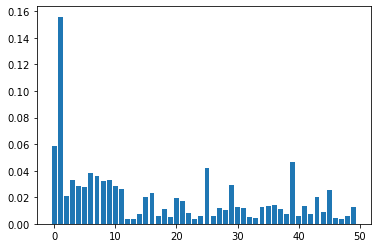

In [117]:
plt.bar(range(len(pipeline_temp['model'].feature_importances_)), pipeline_temp['model'].feature_importances_)
plt.show()

In [151]:
from sklearn.ensemble import GradientBoostingClassifier
oh2 = OneHotEncoder(handle_unknown='ignore', sparse=False)
gb = GradientBoostingClassifier(n_estimators=150, max_depth=30, learning_rate=0.3)
pipeline_temp2 = Pipeline(steps=[('preprocessor', oh2),('model', gb)])

In [152]:
pipeline_temp2.fit(train_X, train_y)

Pipeline(memory=None,
         steps=[('preprocessor',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=False)),
                ('model',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.3, loss='deviance',
                                            max_depth=30, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                   

In [155]:
y_pred2 = pipeline_temp2.predict(val_X)
round((y_pred2==val_y).sum()/len(y_pred), 3)

0.326

In [115]:
a=train_X.iloc[0]

In [116]:
a

age                                                     Baby
gender                                                Female
size                                                  Medium
breeds.primary                American Staffordshire Terrier
name_pop                                                High
breed_pop                                             Medium
breeds.mixed                                            True
attributes.spayed_neutered                              True
attributes.house_trained                                True
attributes.special_needs                               False
attributes.shots_current                                True
contact.address.state                                     MN
Name: 36084, dtype: object

In [118]:
train_X.head()

,age,gender,size,breeds.primary,name_pop,breed_pop,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state
36084,Baby,Female,Medium,American Staffordshire Terrier,High,Medium,True,True,True,False,True,MN
24913,Young,Female,Large,Labrador Retriever,Low,High,True,True,True,False,True,TX
57946,Young,Female,Medium,Boxer,Low,Medium,True,True,False,False,True,CA
26656,Young,Female,Medium,American Staffordshire Terrier,Medium,Medium,False,True,True,False,True,NY
55646,Baby,Female,Medium,Labrador Retriever,High,High,True,True,False,False,True,MN


In [128]:
import pickle
filename = './models/rfpipe_cg.pkl'
pickle.dump(pipeline_temp, open(filename, 'wb'))

In [153]:
import pickle
filename = './models/gbpipe_cg.pkl'
pickle.dump(pipeline_temp2, open(filename, 'wb'))

In [ ]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(OH_train_X, train_y)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
#pipeline_1 = Pipeline(steps=[('model', RandomForestRegressor(random_state=0))])
#pipeline_2 = Pipeline(steps=[('model', DecisionTreeRegressor(random_state=0))])
#pipeline_3 = Pipeline(steps=[('model', XGBRegressor(random_state=0))])

In [ ]:
#next few cells are just testing

In [ ]:
#testing out encoders

In [9]:
train_X.head()

,age,gender,size,name_pop,breed_pop,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state
8969,Baby,Female,Medium,Low,High,True,True,False,False,True,NY
16555,Adult,Male,Medium,Low,Medium,False,True,False,False,True,TX
58815,Adult,Female,Medium,High,Low,True,False,False,False,False,CA
23874,Adult,Male,Small,High,Medium,True,True,False,False,True,NY
17596,Young,Male,Large,High,Low,True,True,True,False,True,CA


In [12]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_X[cat_col]))
OH_cols_val = pd.DataFrame(OH_encoder.transform(val_X[cat_col]))

In [13]:
# One-hot encoding removed index; put it back
OH_cols_train.index = train_X.index
OH_cols_val.index = val_X.index
rest_train = train_X.drop(cat_col, axis=1)
rest_val = val_X.drop(cat_col, axis=1)
OH_train_X = pd.concat([rest_train, OH_cols_train], axis=1)
OH_val_X = pd.concat([rest_val, OH_cols_val], axis=1)

In [42]:
rf = RandomForestRegressor(n_estimators=10, max_depth=5, n_jobs=-1)
rf_model = rf.fit(OH_train_X, train_y)
y_pred = rf_model.predict(OH_val_X)
mae_x=mean_absolute_error(val_y, y_pred)
mae_x

198.06307707707575

In [12]:
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
rf = RandomForestRegressor(n_estimators=10, max_depth=5, n_jobs=-1)
pipeline_temp = Pipeline(steps=[('preprocessor', oh),('model', rf)])
scores= -1 * cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='neg_mean_absolute_error')
print('Est: {} / Depth: {} ---- MAE: {}'.format(n_est,depth,round(scores.mean(), 3)))

Est: 10 / Depth: 10 ---- MAE: 196.655


In [ ]:
#main code starts here

In [11]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [27]:
def train_RF(n_est, depth):
    rf = RandomForestRegressor(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    pipeline_temp = Pipeline(steps=[('preprocessor', oh),('model', rf)])
    #scores= -1 * cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='neg_mean_absolute_error')
    r2s= cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='r2')
    #print('Est: {} / Depth: {} ---- MAE: {} R^2: {}'.format(n_est,depth,round(scores.mean(), 3),round(r2s.mean(), 3)))
    print('Est: {} / Depth: {} ---- R^2: {}'.format(n_est,depth,round(r2s.mean(), 3)))

In [28]:
for n_est in [10, 50, 100]:
    for depth in [10, 50, 100]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- R^2: 0.098
Est: 10 / Depth: 50 ---- R^2: 0.087
Est: 10 / Depth: 100 ---- R^2: 0.087
Est: 50 / Depth: 10 ---- R^2: 0.098
Est: 50 / Depth: 50 ---- R^2: 0.088
Est: 50 / Depth: 100 ---- R^2: 0.089
Est: 100 / Depth: 10 ---- R^2: 0.099
Est: 100 / Depth: 50 ---- R^2: 0.089
Est: 100 / Depth: 100 ---- R^2: 0.089


In [19]:
def train_DT(n_est, depth):
    rf = DecisionTreeRegressor(min_samples_split=mss, max_depth=depth,n_jobs=-1)
    pipeline_temp = Pipeline(steps=[('preprocessor', oh),('model', rf)])
    scores= -1 * cross_val_score(pipeline_temp, trainval_X, trainval_y,cv=5,scoring='neg_mean_absolute_error')
    print('MSS: {} / Depth: {} ---- MAE: {}'.format(n_est,depth,round(scores.mean(), 3)))

In [20]:
for mss in [2, 5, 10]:
    for depth in [10, 50, 100]:
        train_DT(mss, depth)

Est: 2 / Depth: 10 ---- MAE: 95.435
Est: 2 / Depth: 50 ---- MAE: 95.535
Est: 2 / Depth: 100 ---- MAE: 95.539
Est: 5 / Depth: 10 ---- MAE: 95.436
Est: 5 / Depth: 50 ---- MAE: 95.508
Est: 5 / Depth: 100 ---- MAE: 95.504
Est: 10 / Depth: 10 ---- MAE: 95.413
Est: 10 / Depth: 50 ---- MAE: 95.44
Est: 10 / Depth: 100 ---- MAE: 95.441


In [ ]:
#model validation

In [12]:
import time
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(oh.fit_transform(train_X[cat_col]))
OH_cols_val = pd.DataFrame(oh.transform(val_X[cat_col]))
OH_cols_train.index = train_X.index
OH_cols_val.index = val_X.index
rest_train = train_X.drop(cat_col, axis=1)
rest_val = val_X.drop(cat_col, axis=1)
OH_train_X = pd.concat([rest_train, OH_cols_train], axis=1)
OH_val_X = pd.concat([rest_val, OH_cols_val], axis=1)

In [20]:
def train_GB(est, max_depth, lr):
    gb = XGBRegressor(n_estimators=est, max_depth=max_depth, learning_rate=lr, n_jobs=-1)
    gb_model = gb.fit(OH_train_X, train_y)
    y_pred = gb_model.predict(OH_val_X)
    r2 =r2_score(val_y,y_pred)
    print('Est: {} / Depth: {} / Learning Rate: {} ---- R^2: {}'.format(n_est,max_depth,lr,round(r2, 3)))

In [21]:
for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)

C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:28:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 50 / Depth: 3 / Learning Rate: 0.01 ---- R^2: -1.973


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:28:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 50 / Depth: 3 / Learning Rate: 0.1 ---- R^2: 0.081


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:28:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 50 / Depth: 3 / Learning Rate: 1 ---- R^2: 0.086


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:28:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 50 / Depth: 7 / Learning Rate: 0.01 ---- R^2: -1.962


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:28:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 50 / Depth: 7 / Learning Rate: 0.1 ---- R^2: 0.088


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:28:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 50 / Depth: 7 / Learning Rate: 1 ---- R^2: 0.079
[21:28:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Est: 50 / Depth: 11 / Learning Rate: 0.01 ---- R^2: -1.961


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:28:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 50 / Depth: 11 / Learning Rate: 0.1 ---- R^2: 0.082


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:28:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 50 / Depth: 11 / Learning Rate: 1 ---- R^2: 0.077


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:28:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 50 / Depth: 15 / Learning Rate: 0.01 ---- R^2: -1.961


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:29:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 50 / Depth: 15 / Learning Rate: 0.1 ---- R^2: 0.08


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:29:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 50 / Depth: 15 / Learning Rate: 1 ---- R^2: 0.077
[21:29:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Est: 100 / Depth: 3 / Learning Rate: 0.01 ---- R^2: -0.668


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:29:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 100 / Depth: 3 / Learning Rate: 0.1 ---- R^2: 0.083


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:29:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 100 / Depth: 3 / Learning Rate: 1 ---- R^2: 0.087


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:29:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 100 / Depth: 7 / Learning Rate: 0.01 ---- R^2: -0.653


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:29:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 100 / Depth: 7 / Learning Rate: 0.1 ---- R^2: 0.086


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:29:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 100 / Depth: 7 / Learning Rate: 1 ---- R^2: 0.077


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:30:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 100 / Depth: 11 / Learning Rate: 0.01 ---- R^2: -0.653


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:30:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 100 / Depth: 11 / Learning Rate: 0.1 ---- R^2: 0.078
[21:30:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Est: 100 / Depth: 11 / Learning Rate: 1 ---- R^2: 0.077


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:30:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 100 / Depth: 15 / Learning Rate: 0.01 ---- R^2: -0.653


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:30:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 100 / Depth: 15 / Learning Rate: 0.1 ---- R^2: 0.078


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:31:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 100 / Depth: 15 / Learning Rate: 1 ---- R^2: 0.077


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:31:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 150 / Depth: 3 / Learning Rate: 0.01 ---- R^2: -0.193
[21:31:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Est: 150 / Depth: 3 / Learning Rate: 0.1 ---- R^2: 0.085


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:31:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 150 / Depth: 3 / Learning Rate: 1 ---- R^2: 0.087


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:31:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 150 / Depth: 7 / Learning Rate: 0.01 ---- R^2: -0.177


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:31:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 150 / Depth: 7 / Learning Rate: 0.1 ---- R^2: 0.085


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:31:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 150 / Depth: 7 / Learning Rate: 1 ---- R^2: 0.077


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:32:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 150 / Depth: 11 / Learning Rate: 0.01 ---- R^2: -0.178


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:32:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 150 / Depth: 11 / Learning Rate: 0.1 ---- R^2: 0.078


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:32:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 150 / Depth: 11 / Learning Rate: 1 ---- R^2: 0.077


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:32:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 150 / Depth: 15 / Learning Rate: 0.01 ---- R^2: -0.178


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:33:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 150 / Depth: 15 / Learning Rate: 0.1 ---- R^2: 0.078


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:33:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 150 / Depth: 15 / Learning Rate: 1 ---- R^2: 0.077


In [24]:
from xgboost import XGBRegressor
gb = XGBRegressor(n_estimators=150, max_depth=7, learning_rate=0.1, n_jobs=-1)

start = time.time()
gb_model = gb.fit(OH_train_X, train_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(OH_val_X)
end = time.time()
pred_time = (end - start)
mae_x=mean_absolute_error(val_y, y_pred)
r2 =r2_score(val_y,y_pred)
print('Fit time: {} / Predict time: {} ---- MAE: {} / R^2: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(mae_x, 3), round(r2,3)))

C:\anaconda_python\envs\Insight\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:24:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fit time: 55.172 / Predict time: 0.747 ---- MAE: 0.248 / R^2: 0.174


In [33]:
from xgboost import XGBRegressor
xg = XGBRegressor(n_estimators=100, max_depth=10, n_jobs=-1)

start = time.time()
xg_model = xg.fit(OH_train_X, train_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = xg_model.predict(OH_val_X)
end = time.time()
pred_time = (end - start)
mae_x=mean_absolute_error(val_y, y_pred)
r2 =r2_score(val_y,y_pred)
print('Fit time: {} / Predict time: {} ---- MAE: {} / R^2: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(mae_x, 3), round(r2,3)))

C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fit time: 13.329 / Predict time: 0.161 ---- MAE: 0.863 / R^2: 0.088


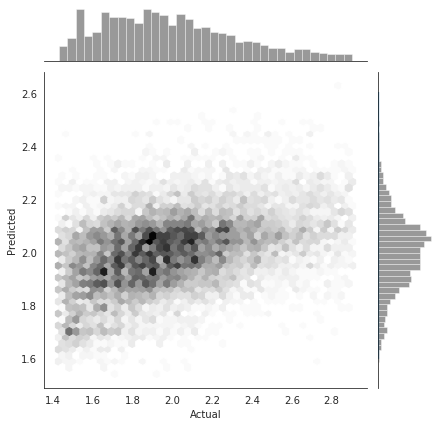

In [31]:
import seaborn as sns
with sns.axes_style("white"):
    ax = sns.jointplot(x=val_y, y=y_pred, kind="hex", color="k");
    ax.set_axis_labels('Actual','Predicted')
plt.plot([1.6, 2.6], [1.6, 2.6], linewidth=2)
    #ax.set_ylabel('Predicted')
    #ax.set(xlim=(1.4,2.8))
    #ax.set(ylim=(1.4,2.8))

In [59]:
#import pickle
#filename = 'finalized_model_demo.sav'
#pickle.dump(model, open(filename, 'wb'))

#filename = 'finalized_model_demo.sav'
#loaded_model = pickle.load(open(filename, 'rb'))
#test pickle
#from sklearn.metrics import mean_absolute_error
#extension_preds = loaded_model.predict(test_X)
#mae_x=mean_absolute_error(test_y, extension_preds)
#print('The mean absolute error is {} which is about {:.2%} of the mean extension'.format(mae_x,(mae_x/mean_x_total)))

NameError: name 'scores' is not defined

In [34]:
import pickle
filename = './models/xgmodel_A2.sav'
pickle.dump(gb_model, open(filename, 'wb'))

In [37]:
a=OH_train_X.iloc[0]

In [38]:
a

breeds.mixed                  True
attributes.spayed_neutered    True
attributes.house_trained      True
attributes.shots_current      True
0                                0
1                                1
2                                0
3                                0
4                                0
5                                1
6                                0
7                                0
8                                1
9                                0
10                               1
11                               0
12                               0
13                               0
Name: 2223, dtype: object

In [47]:
xnew = [[True, True, True, True, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0]]

In [50]:
d = pd.DataFrame(xnew, columns=['breeds.mixed', 'attributes.spayed_neutered', 'attributes.house_trained', 'attributes.shots_current', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'])

In [51]:
d

,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.shots_current,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,True,True,True,True,0,1,0,0,0,1,0,0,1,0,1,0,0,0


In [53]:
np.exp(gb_model.predict(d))

array([30.07968], dtype=float32)

In [54]:
d['10'] = 0
d['11'] = 1
d

,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.shots_current,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,True,True,True,True,0,1,0,0,0,1,0,0,1,0,0,1,0,0


In [55]:
np.exp(gb_model.predict(d))

array([19.768171], dtype=float32)

In [56]:
d['11'] = 0
d['12'] = 1
np.exp(gb_model.predict(d))

array([21.004389], dtype=float32)

In [57]:
d['12'] = 0
d['13'] = 1
np.exp(gb_model.predict(d))

array([31.470345], dtype=float32)

In [44]:
#Linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

start = time.time()
lr_model = lr.fit(OH_train_X, train_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = lr_model.predict(OH_val_X)
end = time.time()
pred_time = (end - start)
mae_x=mean_absolute_error(val_y, y_pred)
r2 =r2_score(val_y,y_pred)
print('Fit time: {} / Predict time: {} ---- MAE: {} / R^2: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(mae_x, 3), round(r2,3)))

Fit time: 0.243 / Predict time: 0.028 ---- MAE: 0.876 / R^2: 0.069


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
params = {'alpha': [0.001, 0.01, 0.1, 1, 5, 10]}
ridge_regressor = GridSearchCV(ridge, params, scoring='r2', cv=5)
ridge_regressor.fit(OH_train_X, train_y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 10}
0.06972839584829206


In [161]:
oh

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

In [160]:
from sklearn.linear_model import Ridge
ridge = Ridge()
pipeline_temp3 = Pipeline(steps=[('preprocessor', oh),('model', ridge)])
pipeline_temp3.fit(train_X, train_y)

ValueError: could not convert string to float: '1 - 2 weeks'

In [49]:
from sklearn.linear_model import Lasso
lasso = Lasso()
params = {'alpha': [1e-10, 1e-5, 1e-3, 1, 10, 30]}
lasso_regressor = GridSearchCV(lasso, params, scoring='r2', cv=5)
lasso_regressor.fit(OH_train_X, train_y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

C:\anaconda_python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\anaconda_python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\anaconda_python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\anaconda_python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

{'alpha': 10}
0.06972839584829206


C:\anaconda_python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [50]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-05}
0.06973029023361599


In [ ]:
#Lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso()

start = time.time()
lr_model = lr.fit(OH_train_X, train_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = lr_model.predict(OH_val_X)
end = time.time()
pred_time = (end - start)
mae_x=mean_absolute_error(val_y, y_pred)
r2 =r2_score(val_y,y_pred)
print('Fit time: {} / Predict time: {} ---- MAE: {} / R^2: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(mae_x, 3), round(r2,3)))

In [57]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [60]:
from sklearn.linear_model import RidgeCV
rcv = RidgeCV(alphas=alphas, scoring='r2', normalize=True)
rcv.fit(OH_train_X, train_y)
rcv.alpha_

0.005

In [63]:
ridgemodel = Ridge(alpha = rcv.alpha_, normalize = True)
ridgemodel.fit(OH_train_X, train_y)
y_pred = ridgemodel.predict(OH_val_X)
r2 =r2_score(val_y,y_pred)
r2

0.06922171956313983

In [64]:
pd.Series(ridgemodel.coef_, index = OH_val_X.columns)

breeds.mixed                  0.011778
breeds.unknown                0.000000
attributes.spayed_neutered    0.044283
attributes.house_trained      0.238269
attributes.special_needs      0.432499
attributes.shots_current      0.099156
0                             0.169981
1                            -0.276809
2                             0.352069
3                             0.083693
4                             0.001179
5                            -0.001202
6                             0.027061
7                            -0.074519
8                             0.113026
9                             0.050514
10                           -0.120750
11                           -0.109579
12                            0.034705
13                            0.005263
14                            0.065023
dtype: float64

In [66]:
from sklearn.linear_model import LassoCV
lcv = LassoCV(alphas=alphas, max_iter=100000, normalize=True)
lcv.fit(OH_train_X, train_y)
lcv.alpha_

C:\anaconda_python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


5000000000.0

In [70]:
lmodel = Lasso(alpha = 0.005, max_iter=100000, normalize = True)
lmodel.fit(OH_train_X, train_y)
y_pred = lmodel.predict(OH_val_X)
r2 =r2_score(val_y,y_pred)
r2

-0.00012802684020307709

In [72]:
len(train_y)

98217

In [51]:
#Ridge regression
from sklearn.linear_model import Ridge
rr = Ridge()

start = time.time()
rr_model = rr.fit(OH_train_X, train_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rr_model.predict(OH_val_X)
end = time.time()
pred_time = (end - start)
mae_x=mean_absolute_error(val_y, y_pred)
r2 =r2_score(val_y,y_pred)
print('Fit time: {} / Predict time: {} ---- MAE: {} / R^2: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(mae_x, 3), round(r2,3)))

Fit time: 0.158 / Predict time: 0.029 ---- MAE: 0.876 / R^2: 0.069
